In [1]:
import os
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import numpy as np
import tensorflow as tf

class IMDB:
    def __init__(self, directory):
        self._directory = directory
        
        self._training_data, self._training_labels = self._load_data("train")
        self._test_data, self._test_labels = self._load_data("test")
        
        np.random.seed(0)
        samples_n = self._training_labels.shape[0]
        random_indices = np.random.choice(samples_n, samples_n // 7, replace = False)
        np.random.seed()
        
        self._validation_data = self._training_data[random_indices]
        self._validation_labels = self._training_labels[random_indices]
        self._training_data = np.delete(self._training_data, random_indices, axis = 0)
        self._training_labels = np.delete(self._training_labels, random_indices)
        
        joined_written_ratings = [word for text in self._training_data for word in text]
        print("Unique words: " + str(len(Counter(joined_written_ratings))))
        print("Mean length: " + str(np.mean([len(text) for text in self._training_data])))
        
    
    def _load_data(self, data_set_type):
        data = []
        labels = []
        # Iterate over conditions
        for condition in ["neg", "pos"]:
            directory_str = os.path.join(self._directory, "aclImdb", data_set_type, condition)
            directory = os.fsencode(directory_str)
        
            for file in os.listdir(directory):
                filename = os.fsdecode(file)
                
                label = 0 if condition == "neg" else 1
                labels.append(label)
                
                # Read written rating from file
                with open(os.path.join(directory_str, filename)) as fd:
                    written_rating = fd.read()
                    written_rating = written_rating.lower()
                    tokenizer = RegexpTokenizer(r'\w+')
                    written_rating = tokenizer.tokenize(written_rating)
                    data.append(written_rating)
                
        return np.array(data), np.array(labels)
    
    def create_dictionaries(self, vocabulary_size, cutoff_length):
        joined_written_ratings = [word for text in self._training_data for word in text]
        words_and_count = Counter(joined_written_ratings).most_common(vocabulary_size - 2)
        
        word2id = {word: word_id for word_id, (word, _) in enumerate(words_and_count, 2)}
        word2id["_UNKNOWN_"] = 0
        word2id["_NOT_A_WORD_"] = 1
        
        id2word = dict(zip(word2id.values(), word2id.keys()))
        
        self._word2id = word2id
        self._id2word = id2word
        
        self._training_data = np.array([self.words2ids(text[:cutoff_length]) for text in self._training_data])
        self._validation_data = np.array([self.words2ids(text[:cutoff_length]) for text in self._validation_data])
        self._test_data = np.array([self.words2ids(text[:cutoff_length]) for text in self._test_data])
        
    
    def words2ids(self, words):
        if type(words) == list or type(words) == range or type(words) == np.ndarray:
            return [self._word2id.get(word, 0) for word in words]
        else:
            return self._word2id.get(words, 0)
    
    def ids2words(self, ids):
        if type(ids) == list or type(ids) == range or type(ids) == np.ndarray:
            return [self._id2word.get(wordid, "_UNKNOWN_") for wordid in ids]
        else:
            return self._id2word.get(ids, "_UNKNOWN_")
    
    
    def get_training_batch(self, batch_size):
        return self._get_batch(self._training_data, self._training_labels, batch_size)
    
    def get_validation_batch(self, batch_size):
        return self._get_batch(self._validation_data, self._validation_labels, batch_size)
    
    def get_test_batch(self, batch_size):
        return self._get_batch(self._test_data, self._test_labels, batch_size)
    
    def _get_batch(self, data, labels, batch_size):
        samples_n = labels.shape[0]
        if batch_size <= 0:
            batch_size = samples_n
        
        random_indices = np.random.choice(samples_n, samples_n, replace = False)
        data = data[random_indices]
        labels = labels[random_indices]        
        
        for i in range(samples_n // batch_size):
            on = i * batch_size
            off = on + batch_size
            yield data[on:off], labels[on:off]
    
    
    def slize_batch(self, batch, slize_size):
        max_len = np.max([len(sample) for sample in batch])
        steps = int(np.ceil(max_len / slize_size))
        max_len = slize_size * steps
        
        # Resize all samples in batch to same size
        batch_size = len(batch)
        buffer = np.ones((batch_size, max_len), dtype = np.int32)
        for i, sample in enumerate(batch):
            buffer[i, 0:len(sample)] = sample
        
        for i in range(steps):
            on = i * slize_size
            off = on + slize_size
            yield buffer[:, on:off]
        
    
    def get_sizes(self):
        training_samples_n = self._training_labels.shape[0]
        validation_samples_n = self._validation_labels.shape[0]
        test_samples_n = self._test_labels.shape[0]
        return training_samples_n, validation_samples_n, test_samples_n

/home/luke/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
imdb_data = IMDB('.')

Unique words: 70503
Mean length: 242.339913202


In [3]:
#investigate the data
for i, batch in enumerate(imdb_data.get_training_batch(1)):
    if i==0:
        print(batch)

(array([ list(['well', 'here', 'we', 'have', 'yet', 'another', 'role', 'reversal', 'movie', 'there', 'were', 'many', 'worth', 'watching', 'despite', 'the', 'tired', 'plot', 'of', 'gender', 'reversal', 'however', 'this', 'one', 'is', 'not', 'in', 'previous', 'reviews', 'i', 'think', 'i', 've', 'made', 'my', 'point', 'about', 'the', 'general', 'decline', 'of', 'enjoyment', 'for', 'haim', 'movies', 'that', 'followed', 'the', 'late', '80s', 'this', 'is', 'one', 'of', 'them', 'br', 'br', 'just', 'one', 'of', 'the', 'girls', 'is', 'about', 'a', 'high', 'school', 'kid', 'corey', 'haim', 'who', 'tries', 'to', 'avoid', 'his', 'bullies', 'by', 'dressing', 'up', 'as', 'a', 'girl', 'and', 'attending', 'another', 'school', 'he', 'joins', 'the', 'cheerleading', 'squad', 'and', 'makes', 'friends', 'with', 'fellow', 'cheerleader', 'marie', 'nicole', 'eggert', 'obviously', 'he', 'can', 't', 'keep', 'up', 'the', 'charade', 'for', 'too', 'much', 'longer', 'br', 'br', 'i', 'thought', 'this', 'movie', 'was

In [4]:
#HYPERPARAMETERS
embedding_size = 64
lstm_mem_size = 64
vocab_size = 20000
review_cutoff_length = 300
subseq_length = 100
batch_size = 250
epochs = 2
learning_rate = 0.03
dropout_rate = 0.85


#create the dictionary
imdb_data.create_dictionaries(vocab_size, review_cutoff_length)

In [5]:
#reset the default graph to avoid variable initializing conflicts
tf.reset_default_graph()

#placeholders for input and target
subseqs_ids = tf.placeholder(tf.int32, [None, subseq_length])
rating = tf.placeholder(tf.int32, [None])
rating_one_hot = tf.one_hot(rating, depth=2)
            

#placeholder for dropout rate
keep_prob = tf.placeholder_with_default(1.0, shape = ())


#node for the embeddings of the words
with tf.variable_scope("embedding"):
    #initializer for embeddings
    initializer = tf.random_uniform_initializer(-1.0, 1.0)
    
    embeddings = tf.get_variable("embedding", [vocab_size, embedding_size], initializer=initializer)
    embeddeds = tf.nn.embedding_lookup(embeddings, subseqs_ids)


#LSTM
with tf.variable_scope("lstm"):
    
    #placeholders for the cell and hidden state initialization
    cell_state = tf.placeholder(tf.float32, [None, lstm_mem_size])
    hidden_state = tf.placeholder(tf.float32, [None, lstm_mem_size])

    #creating an lstm cell instance
    cell = tf.nn.rnn_cell.BasicLSTMCell(lstm_mem_size)
    #dropout
    cell = tf.nn.rnn_cell.DropoutWrapper(cell, output_keep_prob = dropout_rate)
    
    #create zero state and initialize hidden and cell state from placeholder values
    zero_state = cell.zero_state(batch_size, tf.float32)
    state = tf.nn.rnn_cell.LSTMStateTuple(c = cell_state, h = hidden_state)

    
    #tf.nn.static_rnn expects list of time step vectors
    sequences = tf.unstack(embeddeds, num = subseq_length, axis = 1)
    
    #unroll the model and return a list of all outputs and the final cell state
    outputs, state = tf.nn.static_rnn(cell, sequences, initial_state = zero_state)
 
    #recreate a tensor from the list of outputs
    outputs = tf.reshape(tf.concat(outputs, 1), [batch_size, subseq_length, lstm_mem_size])


with tf.variable_scope("readout"):
    #get the mean of all the hidden outputs together
    outputs_mean = tf.reduce_mean(outputs, axis=1)
    
    weights_ffnn = tf.Variable(tf.truncated_normal([lstm_mem_size,2], stddev = 0.1))
    biases_ffnn = tf.Variable(tf.constant(0.0, shape=[2]))
    
    logits = tf.matmul(outputs_mean, weights_ffnn) + biases_ffnn
    
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
                        labels = rating_one_hot, logits = logits )
    loss = tf.reduce_mean(cross_entropy)
    tf.summary.scalar("loss", loss)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(rating_one_hot, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy", accuracy)
    

with tf.variable_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_step = optimizer.minimize(loss)

merged_summaries = tf.summary.merge_all()

In [7]:
#training
train_writer = tf.summary.FileWriter("./summaries/train", tf.get_default_graph())
validation_writer = tf.summary.FileWriter("./summaries/validation", tf.get_default_graph())

with tf.Session() as sess:
    step = 0
    val_step = 0
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        batch_generator = imdb_data.get_training_batch(batch_size)
        for data, label in batch_generator:
            #get the initial hidden and cell state
            _state = sess.run(zero_state)
            
            
            
            
            
            for subsequence in imdb_data.slize_batch(data, subseq_length):
                   
                
                
          
                _loss, _acc, _state, _, _summaries = sess.run(
                                    [loss, accuracy, state, training_step, merged_summaries],
                                    feed_dict = {
                                        subseqs_ids : subsequence,
                                        rating :  label,
                                        keep_prob : dropout_rate,
                                        cell_state: _state.c,
                                        hidden_state: _state.h
                                    })
                
                train_writer.add_summary(_summaries, step)
                step += 1
                
                
        # Validation section
        batch_generator = imdb_data.get_validation_batch(batch_size)
        for data, label in batch_generator:
            #get the initial hidden and cell state
            _state = sess.run(zero_state)
            
            
            
            
            
            for subsequence in imdb_data.slize_batch(data, subseq_length):
                   
                
                
          
                _loss, _acc, _state, _summaries = sess.run(
                                    [loss, accuracy, state, merged_summaries],
                                    feed_dict = {
                                        subseqs_ids : subsequence,
                                        rating :  label,
                                        keep_prob : dropout_rate,
                                        cell_state: _state.c,
                                        hidden_state: _state.h
                                    })
                
                validation_writer.add_summary(_summaries, val_step)
                val_step += 1
                
                
    # Test section
    batch_generator = imdb_data.get_test_batch(batch_size)
    t_loss, t_acc = [], []
    for data, label in batch_generator:
        #get the initial hidden and cell state
        _state = sess.run(zero_state)





        for subsequence in imdb_data.slize_batch(data, subseq_length):




            _loss, _acc, _state, _summaries = sess.run(
                                [loss, accuracy, state, merged_summaries],
                                feed_dict = {
                                    subseqs_ids : subsequence,
                                    rating :  label,
                                    keep_prob : dropout_rate,
                                    cell_state: _state.c,
                                    hidden_state: _state.h
                                })
            t_loss.append(_loss)
            t_acc.append(_acc)
    print('Loss and accuracy:{}, {}'.format(np.mean(t_loss), np.mean(t_acc)))

    embeddings_arr = embeddings.eval()
               
                
                
                

Loss and accuracy:0.5008639097213745, 0.7311599850654602


In [8]:
#np.save('./embbedings.npy',embeddings_arr)

In [7]:
embeddings_arr = np.load('./embbedings.npy')
print(embeddings_arr.shape)

(20000, 64)


<IPython.core.display.Javascript object>


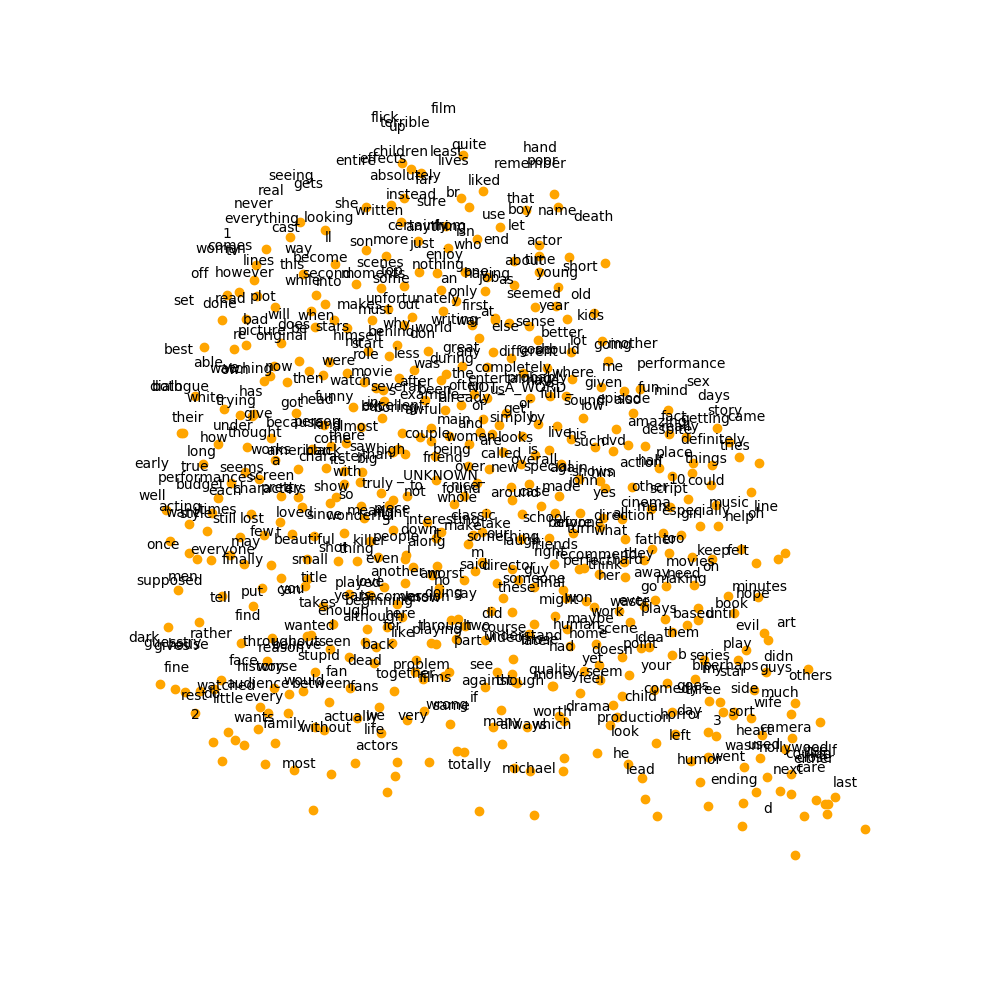

In [12]:
#visulaizing 

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib notebook

#HYPERPARAMTERS tsne
start_n = 0
n = 500 #how many words to visualize
prp = 40 #perplexity rate

#get the data for the visualization
ids = np.arange(start_n,start_n+n)
words = imdb_data.ids2words(ids)
 


#tsne
tsne = TSNE(perplexity=prp, n_components=2, init='pca',
           n_iter_without_progress=300, method='exact')
embeddings_arr = embeddings_arr[start_n:start_n+n,:]
embeddings_2d = tsne.fit_transform(embeddings_arr)

#embeddings_2d = embeddings_2d[start_n:start_n+n,:]

#plotting
fig = plt.figure(figsize=(10,10))
plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],c='orange')
plt.axis('off')
for i in range(n):
    xi = embeddings_2d[i,0]
    yi = embeddings_2d[i,1]
    plt.annotate(words[i], xy=(xi,yi), xytext=(xi-3,yi+3))
plt.show()
